#### Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

##### Loading data

In [2]:
opened = pd.read_csv('email_opened_table.csv')
email_table = pd.read_csv('email_table.csv')
clicked = pd.read_csv('link_clicked_table.csv')

In [3]:
email_table

,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases
0,85120,short_email,personalized,2,Sunday,US,5
1,966622,long_email,personalized,12,Sunday,UK,2
2,777221,long_email,personalized,11,Wednesday,US,2
3,493711,short_email,generic,6,Monday,UK,1
4,106887,long_email,generic,14,Monday,US,6
...,...,...,...,...,...,...,...
99995,803504,short_email,personalized,4,Monday,US,5
99996,899722,long_email,personalized,7,Saturday,US,1
99997,449610,long_email,personalized,11,Saturday,UK,6
99998,72497,short_email,generic,10,Monday,UK,0


In [4]:
opened

,email_id
0,284534
1,609056
2,220820
3,905936
4,164034
...,...
10340,990213
10341,918210
10342,200299
10343,211104


##### Making new column with value 1 for opened

In [5]:
opened['opened'] = 1

In [6]:
clicked

,email_id
0,609056
1,870980
2,935124
3,158501
4,177561
...,...
2114,873162
2115,435454
2116,206772
2117,742967


##### Making new column for clicked with value 1

In [7]:
clicked['clicked'] = 1

##### Merging diffrent data on email id

In [8]:
emails = pd.merge(email_table, clicked[['email_id', 'clicked']], on='email_id', how='left')

In [9]:
emails = pd.merge(emails, opened[['email_id', 'opened']], on='email_id', how='left')

In [10]:
emails

,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases,clicked,opened
0,85120,short_email,personalized,2,Sunday,US,5,NaN,NaN
1,966622,long_email,personalized,12,Sunday,UK,2,1.0,1.0
2,777221,long_email,personalized,11,Wednesday,US,2,NaN,NaN
3,493711,short_email,generic,6,Monday,UK,1,NaN,NaN
4,106887,long_email,generic,14,Monday,US,6,NaN,NaN
...,...,...,...,...,...,...,...,...,...
99995,803504,short_email,personalized,4,Monday,US,5,NaN,NaN
99996,899722,long_email,personalized,7,Saturday,US,1,NaN,NaN
99997,449610,long_email,personalized,11,Saturday,UK,6,NaN,NaN
99998,72497,short_email,generic,10,Monday,UK,0,NaN,NaN


##### Describing data

In [11]:
emails.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   email_id             100000 non-null  int64  
 1   email_text           100000 non-null  object 
 2   email_version        100000 non-null  object 
 3   hour                 100000 non-null  int64  
 4   weekday              100000 non-null  object 
 5   user_country         100000 non-null  object 
 6   user_past_purchases  100000 non-null  int64  
 7   clicked              2119 non-null    float64
 8   opened               10345 non-null   float64
dtypes: float64(2), int64(3), object(4)
memory usage: 6.9+ MB


In [12]:
emails['clicked'] = emails['clicked'].fillna(0)
emails['opened'] = emails['opened'].fillna(0)

In [13]:
emails.sample(10)

,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases,clicked,opened
35342,891491,long_email,generic,14,Wednesday,FR,3,0.0,0.0
57734,495916,short_email,personalized,8,Wednesday,FR,3,0.0,0.0
62739,718279,short_email,generic,13,Thursday,US,7,1.0,1.0
98235,275239,long_email,generic,10,Friday,US,1,0.0,0.0
73282,327150,long_email,generic,8,Saturday,UK,0,0.0,0.0
64993,357877,short_email,generic,11,Saturday,US,2,0.0,0.0
24648,568181,short_email,personalized,21,Sunday,US,0,0.0,0.0
79082,197068,long_email,personalized,13,Monday,US,2,0.0,0.0
13957,78863,long_email,generic,7,Sunday,ES,4,0.0,0.0
2978,492626,long_email,generic,4,Wednesday,UK,4,0.0,0.0


##### Changing the data type of clicked and opened column from float to int64

In [14]:
emails['clicked'] = emails['clicked'].astype('int64')
emails['opened'] = emails['opened'].astype('int64')

##### Checking null values

In [15]:
emails.isna().sum()

email_id               0
email_text             0
email_version          0
hour                   0
weekday                0
user_country           0
user_past_purchases    0
clicked                0
opened                 0
dtype: int64

##### Visualizing the click and opened emails

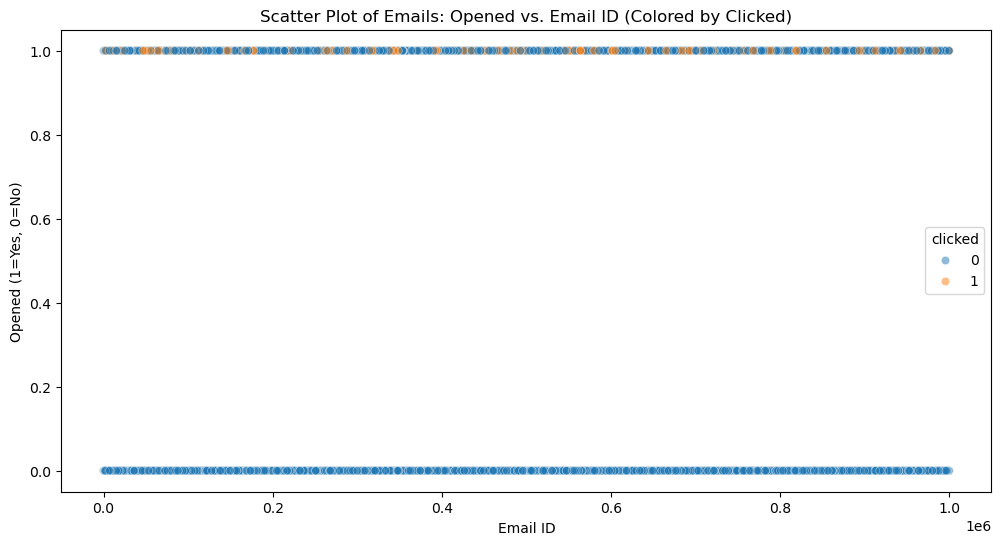

In [16]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=emails, x='email_id', y='opened', hue='clicked', alpha=0.5)
plt.title('Scatter Plot of Emails: Opened vs. Email ID (Colored by Clicked)')
plt.xlabel('Email ID')
plt.ylabel('Opened (1=Yes, 0=No)')
plt.show()

##### Visualizing the distribution and relationships between numerical features using a pair plot.

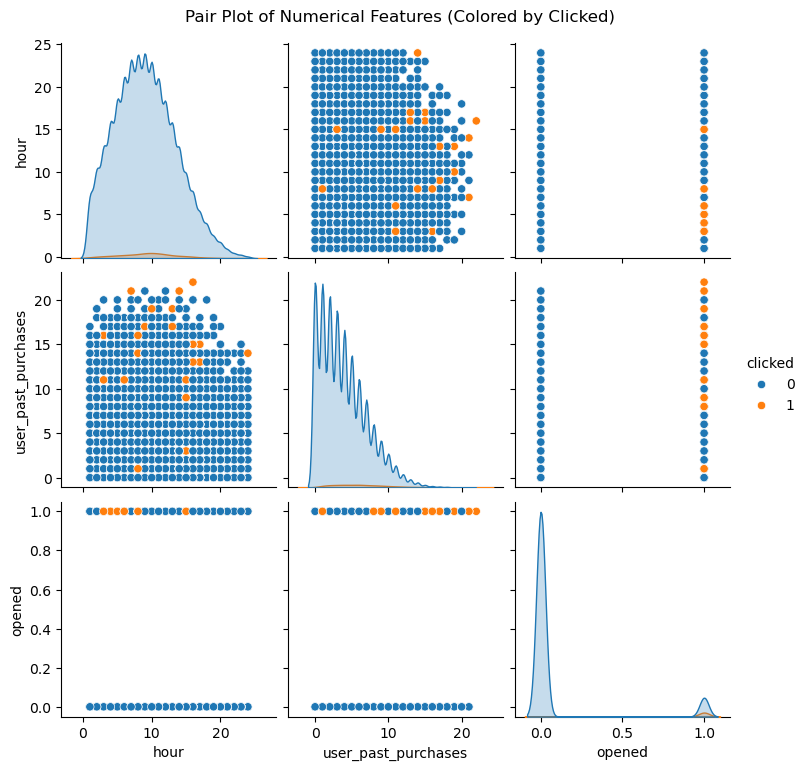

In [17]:
numerical_cols = ['hour', 'user_past_purchases', 'opened', 'clicked']
sns.pairplot(emails[numerical_cols], hue='clicked', diag_kind='kde')
plt.suptitle('Pair Plot of Numerical Features (Colored by Clicked)', y=1.02)
plt.show()

##### Describing data

In [18]:
emails.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   email_id             100000 non-null  int64 
 1   email_text           100000 non-null  object
 2   email_version        100000 non-null  object
 3   hour                 100000 non-null  int64 
 4   weekday              100000 non-null  object
 5   user_country         100000 non-null  object
 6   user_past_purchases  100000 non-null  int64 
 7   clicked              100000 non-null  int64 
 8   opened               100000 non-null  int64 
dtypes: int64(5), object(4)
memory usage: 6.9+ MB


##### Checking for duplicate value

In [19]:
emails.duplicated().sum()

0

##### checking for the number of email that are opend, clicked and opened but didtn clicked

In [20]:
clicked_and_opened = emails[(emails['clicked'] == 1) & (emails['opened'] == 1)].shape[0]
not_clicked_not_opened = emails[(emails['clicked'] == 0) & (emails['opened'] == 0)].shape[0]
opened_not_clicked = emails[(emails['opened'] == 1) & (emails['clicked'] == 0)].shape[0]
# It's logically impossible to click without opening in this dataset's context
clicked_not_opened_check = emails[(emails['opened'] == 0) & (emails['clicked'] == 1)].shape[0]

print(f"Emails clicked and opened: {clicked_and_opened}")
print(f"Emails not clicked and not opened: {not_clicked_not_opened}")
print(f"Emails opened but not clicked: {opened_not_clicked}")
print(f"Emails clicked but not opened (anomaly check): {clicked_not_opened_check}")

Emails clicked and opened: 2069
Emails not clicked and not opened: 89605
Emails opened but not clicked: 8276
Emails clicked but not opened (anomaly check): 50


##### Creating a new column based on engagement status (opened/clicked)

In [21]:
def get_engagement_status(row):
    if row['clicked'] == 1 and row['opened'] == 1:
        return "Clicked and Opened"
    elif row['opened'] == 1 and row['clicked'] == 0:
        return "Opened but Not Clicked"
    elif row['opened'] == 0 and row['clicked'] == 0:
        return "Not Opened"
    else:
        # Handle potential anomalies or unexpected cases, though clicked=1/opened=0 shouldn't occur
        return "Anomaly"

emails['engagement_status'] = emails.apply(get_engagement_status, axis=1)

# Display the DataFrame with the new column and the counts of each status
print(emails['engagement_status'].value_counts())
emails.head()

engagement_status
Not Opened                89605
Opened but Not Clicked     8276
Clicked and Opened         2069
Anomaly                      50
Name: count, dtype: int64


,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases,clicked,opened,engagement_status
0,85120,short_email,personalized,2,Sunday,US,5,0,0,Not Opened
1,966622,long_email,personalized,12,Sunday,UK,2,1,1,Clicked and Opened
2,777221,long_email,personalized,11,Wednesday,US,2,0,0,Not Opened
3,493711,short_email,generic,6,Monday,UK,1,0,0,Not Opened
4,106887,long_email,generic,14,Monday,US,6,0,0,Not Opened


##### Removing the 4th category clicked but not open that is not possible

In [22]:
anomaly_indices = emails[emails['engagement_status'] == 'Anomaly'].index
emails.drop(anomaly_indices, inplace=True)

In [23]:
(emails['engagement_status']=='anamoly').sum()

0

##### Performing feature engineering to drop the column with minimum weightage

In [24]:
emails[['user_past_purchases', 'clicked']].corr()

,user_past_purchases,clicked
user_past_purchases,1.00000,0.10694
clicked,0.10694,1.00000


C:\Users\rites\AppData\Local\Temp\ipykernel_28376\40343883.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=emails, x='user_past_purchases', y='clicked', ci=None, palette='viridis')
C:\Users\rites\AppData\Local\Temp\ipykernel_28376\40343883.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=emails, x='user_past_purchases', y='clicked', ci=None, palette='viridis')


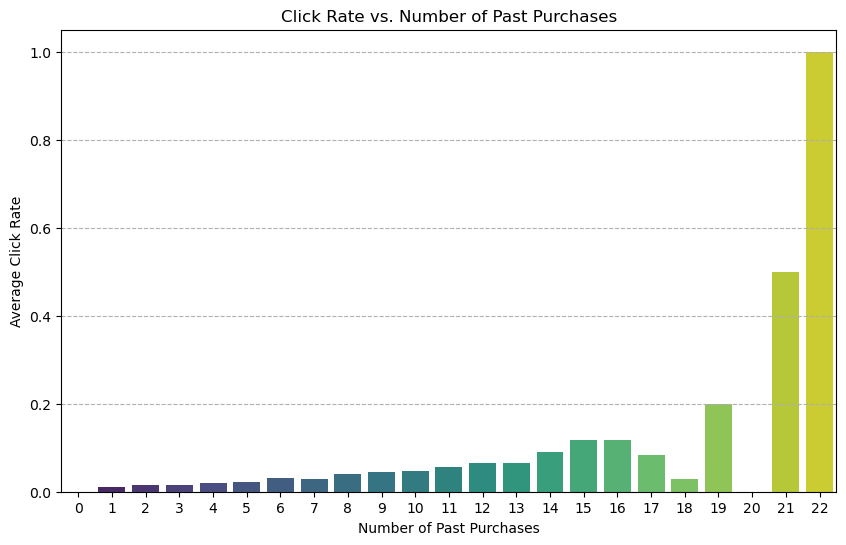

In [25]:
# Visualize the relationship between past purchases and click rate
plt.figure(figsize=(10, 6))
sns.barplot(data=emails, x='user_past_purchases', y='clicked', ci=None, palette='viridis')
plt.title('Click Rate vs. Number of Past Purchases')
plt.xlabel('Number of Past Purchases')
plt.ylabel('Average Click Rate')
plt.grid(axis='y', linestyle='--')

In [26]:
from scipy.stats import chi2_contingency

# Calculate contingency table for user_country vs clicked
contingency_table_user_country = pd.crosstab(emails['user_country'], emails['clicked'])
chi2_country, p_country, dof_country, expected_country = chi2_contingency(contingency_table_user_country)

print(f"User Country vs Clicked: Chi2 = {chi2_country}, p-value = {p_country}")

User Country vs Clicked: Chi2 = 207.4092378823248, p-value = 1.0570348835047669e-44


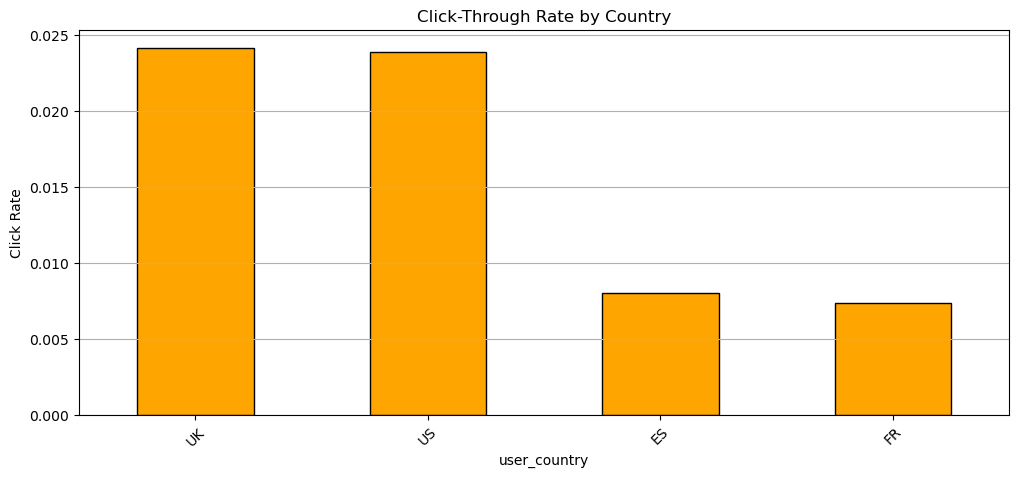

In [27]:
emails.groupby('user_country')['clicked'].mean().sort_values(ascending=False).plot(kind='bar', figsize=(12,5), color='orange', edgecolor='black')
plt.title("Click-Through Rate by Country")
plt.ylabel("Click Rate")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [28]:
# Calculate contingency table for email_text vs clicked
contingency_table_email_text = pd.crosstab(emails['email_text'], emails['clicked'])
chi2_text, p_text, dof_text, expected_text = chi2_contingency(contingency_table_email_text)

print(f"Email Text vs Clicked: Chi2 = {chi2_text}, p-value = {p_text}")

Email Text vs Clicked: Chi2 = 36.328219534707365, p-value = 1.6673212338017654e-09


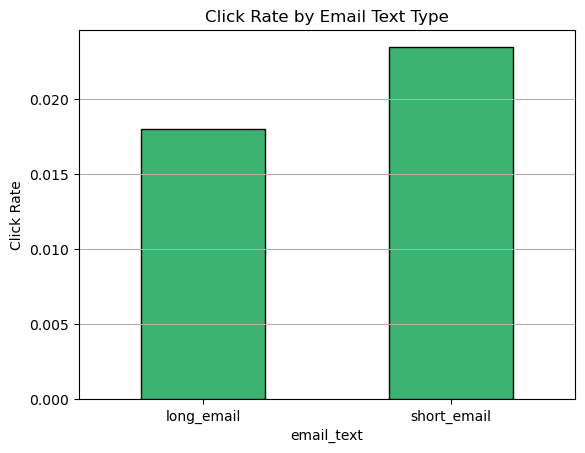

In [29]:
emails.groupby('email_text')['clicked'].mean().plot(kind='bar', color='mediumseagreen', edgecolor='black')
plt.title("Click Rate by Email Text Type")
plt.ylabel("Click Rate")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

In [30]:
# Calculate contingency table for email_version vs clicked
contingency_table_email_version = pd.crosstab(emails['email_version'], emails['clicked'])
chi2_version, p_version, dof_version, expected_version = chi2_contingency(contingency_table_email_version)

print(f"Email Version vs Clicked: Chi2 = {chi2_version}, p-value = {p_version}")

Email Version vs Clicked: Chi2 = 188.7452960181036, p-value = 5.973247006205782e-43


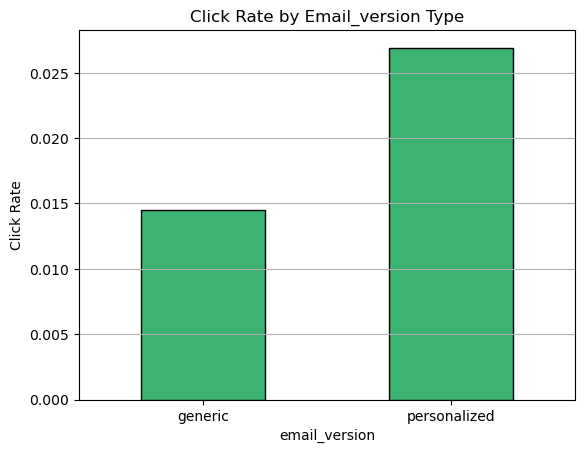

In [31]:
emails.groupby('email_version')['clicked'].mean().plot(kind='bar', color='mediumseagreen', edgecolor='black')
plt.title("Click Rate by Email_version Type")
plt.ylabel("Click Rate")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

In [32]:
contingency_table_hour_day = pd.crosstab([emails['hour'], emails['weekday']], emails['clicked'])
chi2, p, dof, expected = chi2_contingency(contingency_table_hour_day)
print(f"Chi² = {chi2:.2f}, p-value = {p:.4e}")

Chi² = 353.52, p-value = 1.8881e-15


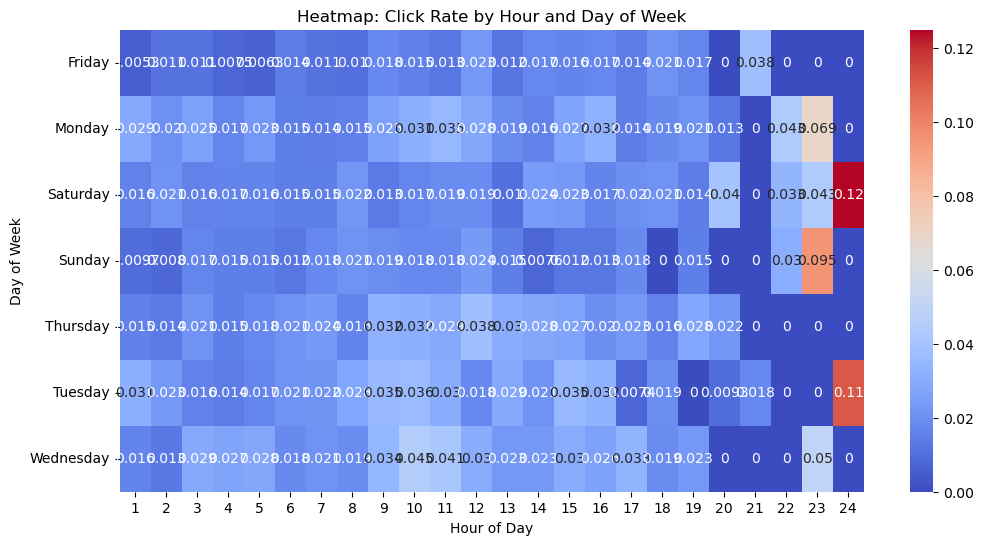

In [33]:
heatmap_data = emails.pivot_table(index='weekday', columns='hour', values='clicked', aggfunc='mean')

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', cbar=True)
plt.title("Heatmap: Click Rate by Hour and Day of Week")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.show()

##### droping column with minnimum wieghtage

In [34]:
emails2 = emails.drop(columns=['email_id', 'user_past_purchases', 'clicked', 'opened'], inplace=False)

In [35]:
emails2.head()

,email_text,email_version,hour,weekday,user_country,engagement_status
0,short_email,personalized,2,Sunday,US,Not Opened
1,long_email,personalized,12,Sunday,UK,Clicked and Opened
2,long_email,personalized,11,Wednesday,US,Not Opened
3,short_email,generic,6,Monday,UK,Not Opened
4,long_email,generic,14,Monday,US,Not Opened


##### saving the cleaned data need for model training

In [36]:
emails2.to_csv('cleaned_data', index=False)

##### 
importing the neccessory libraies need for model training

In [37]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

##### deviding the data into x and y for training

In [38]:
X = emails2[['hour', 'weekday', 'user_country', 'email_text', 'email_version']]
y = emails2['engagement_status']

##### Encoding categorical target variables

In [39]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


In [40]:
categorical_features = ['weekday', 'email_text', 'email_version']
numerical_features = ['hour']

##### Creating column transformer for preprocessing

In [41]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ]
)

In [42]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(multi_class='multinomial', max_iter=1000,class_weight='balanced'))
])

In [43]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2,stratify=y, random_state=42)

In [44]:
# Training the model
pipeline.fit(X_train,y_train)

C:\Users\rites\anaconda33\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['hour']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['weekday', 'email_text',
                                                   'email_version'])])),
                ('classifier',
                 LogisticRegression(class_weight='balanced', max_iter=1000,
                                    multi_class='multinomial'))])

In [45]:
y_pred = pipeline.predict(X_test)

In [46]:
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
                         precision    recall  f1-score   support

    Clicked and Opened       0.03      0.50      0.06       414
            Not Opened       0.93      0.55      0.69     17921
Opened but Not Clicked       0.10      0.13      0.11      1655

              accuracy                           0.51     19990
             macro avg       0.35      0.39      0.29     19990
          weighted avg       0.84      0.51      0.63     19990

Confusion Matrix:
 [[ 208  148   58]
 [6134 9850 1937]
 [ 791  649  215]]


In [47]:
pip install xgboost

In [48]:
import xgboost as xgb

In [49]:
# computing scale_pos_weight for imbalanced

from collections import Counter
counter = Counter(y_train)
scale_pos_weight = counter[0] / counter[1]  # Useful if class 1 is minority

In [50]:
# creating pipeline with xgboost model
pipeline2= Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('classifier', xgb.XGBClassifier(
    objective='binary:logistic', 
    eval_metric='logloss',
    scale_pos_weight=scale_pos_weight,  # Use this if classes are imbalanced
    use_label_encoder=False,
    random_state=42)
)
    
]) 


In [51]:
pipeline2.fit(X_train,y_train)

C:\Users\rites\anaconda33\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:34:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['hour']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['weekday', 'email_text',
                                                   'email_version'])])),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [52]:
y_pred = pipeline2.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[    0   414     0]
 [    0 17921     0]
 [    0  1655     0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       414
           1       0.90      1.00      0.95     17921
           2       0.00      0.00      0.00      1655

    accuracy                           0.90     19990
   macro avg       0.30      0.33      0.32     19990
weighted avg       0.80      0.90      0.85     19990



C:\Users\rites\anaconda33\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rites\anaconda33\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rites\anaconda33\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [53]:
import joblib

In [54]:
joblib.dump(pipeline2, "email_engagement_model.joblib")

['email_engagement_model.joblib']

### Calculate Engagement Metrics

In [55]:
# Calculate metrics using predictive analysis
def calculate_optimized_metrics(emails, model):
    # Get base metrics
    base_metrics = {
        'open_rate': (emails['opened'] == 1).mean() * 100,
        'click_rate': (emails['clicked'] == 1).mean() * 100,
        'engagement_score': ((emails['clicked'] * 2 + emails['opened']) / 3 * 10).mean()
    }
    
    # Find optimal hours using model predictions
    hour_scores = []
    for hour in range(24):
        test_data = emails2.copy()
        test_data['hour'] = hour
        predictions = model.predict_proba(test_data[['hour', 'weekday', 'user_country', 'email_text', 'email_version']])
        hour_scores.append((hour, predictions[:,2].mean()))  # Index 2 for 'Clicked and Opened'
    
    best_hours = sorted(hour_scores, key=lambda x: x[1], reverse=True)[:3]
    
    # Find optimal days
    days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    day_scores = []
    for day in days:
        test_data = emails2.copy()
        test_data['weekday'] = day
        predictions = model.predict_proba(test_data[['hour', 'weekday', 'user_country', 'email_text', 'email_version']])
        day_scores.append((day, predictions[:,2].mean()))
    
    best_days = sorted(day_scores, key=lambda x: x[1], reverse=True)[:3]
    
    # Find optimal countries
    countries = emails2['user_country'].unique()
    country_scores = []
    for country in countries:
        test_data = emails2.copy()
        test_data['user_country'] = country
        predictions = model.predict_proba(test_data[['hour', 'weekday', 'user_country', 'email_text', 'email_version']])
        country_scores.append((country, predictions[:,2].mean()))
    
    best_countries = sorted(country_scores, key=lambda x: x[1], reverse=True)[:3]
    
    metrics = {
        **base_metrics,
        'best_hours': [h[0] for h in best_hours],
        'best_days': [d[0] for d in best_days],
        'top_countries': [c[0] for c in best_countries],
        'hour_scores': dict(hour_scores),
        'day_scores': dict(day_scores),
        'country_scores': dict(country_scores)
    }
    
    return metrics

# Calculate optimized metrics using the trained model
optimized_metrics = calculate_optimized_metrics(emails, pipeline)

# Save updated metrics
joblib.dump(optimized_metrics, 'email_engagement_metrics.joblib')

['email_engagement_metrics.joblib']